**In tackling the task at hand, we've employed a supervised machine learning approach, specifically leveraging decision tree or random forest models to address the problem statement.** In supervised machine learning, our dataset is labeled, meaning each data point is associated with a target variable representing the nature of the mushroom—whether it's poisonous or edible—that our model aims to predict based on input features.
    Classification, the type of supervised learning we've utilized, involves predicting categorical class labels for new instances based on patterns learned from past observations. **Decision tree and random forest models are popular choices for classification tasks like this. They work by recursively partitioning the feature space into regions and assigning a class label to each region.**
Unlike logistic regression, which is tailored for modeling binary dependent variables, decision trees and random forests are versatile tools that can handle both binary and multi-class classification problems effectively. While logistic regression estimates the probability of an instance belonging to a particular category, decision trees and random forests make predictions by traversing a tree-like structure based on feature values, ultimately assigning a class label to the input instance.

--Importing Required Libraries--

In [19]:
import pandas as pd #to load data
import numpy as np #to manipualte and organise
import matplotlib.pyplot as plt #for data visualisation
import seaborn as sns
#import plotly.express as px
from sklearn.preprocessing import LabelEncoder #for encoding the data
from sklearn.model_selection import train_test_split #to split the data for training and validation
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
print("DONE IMPORTING LIBRARIES!")

DONE IMPORTING LIBRARIES!


--Data Loading--

In [20]:
mushroom_data=pd.read_csv("./mushrooms.csv")
mushroom_data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [21]:
mushroom_data.nunique()

class                        2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64

In [22]:
mushroom_data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [23]:
mushroom_data.shape

(8124, 23)

In [24]:
mushroom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

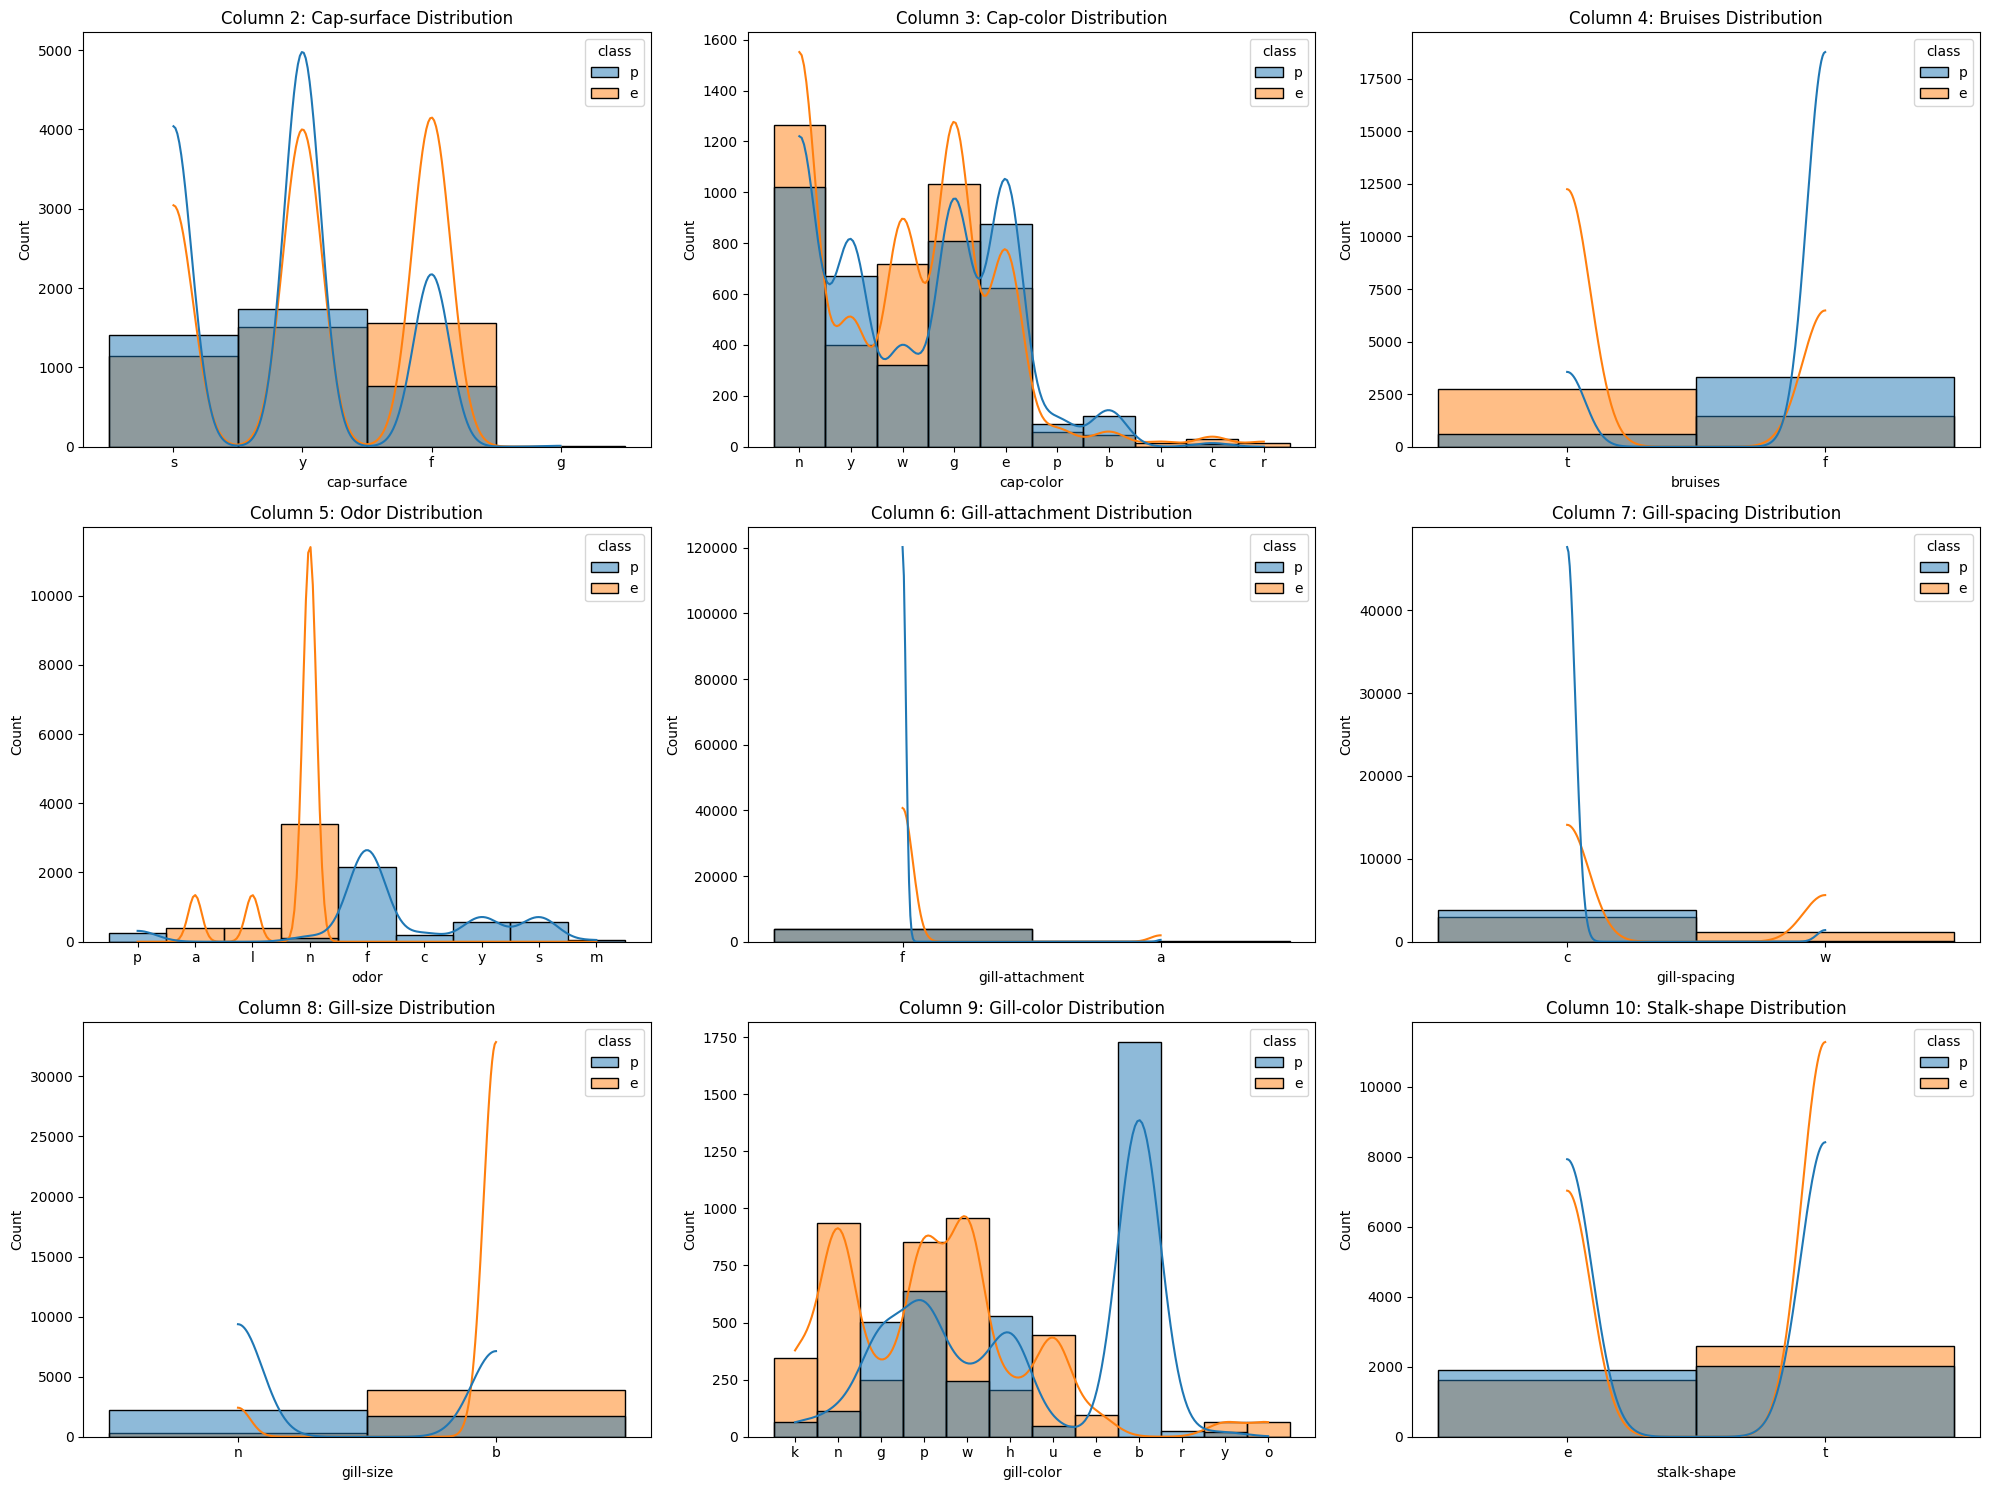

In [25]:
fig, axs = plt.subplots(3, 3, figsize=(20, 15))  # Create subplots with 5 rows and 3 columns
axs_flat = axs.flatten()

# Loop through each column (excluding the first two) and corresponding axis
for i, (column, ax) in enumerate(zip(mushroom_data.columns[2:11], axs_flat)):
    sns.histplot(data=mushroom_data, x=column, hue='class', bins=20, ax=ax, kde='true')
    ax.set_title('Column ' + str(i+2) + ': ' + column.capitalize() + ' Distribution')

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


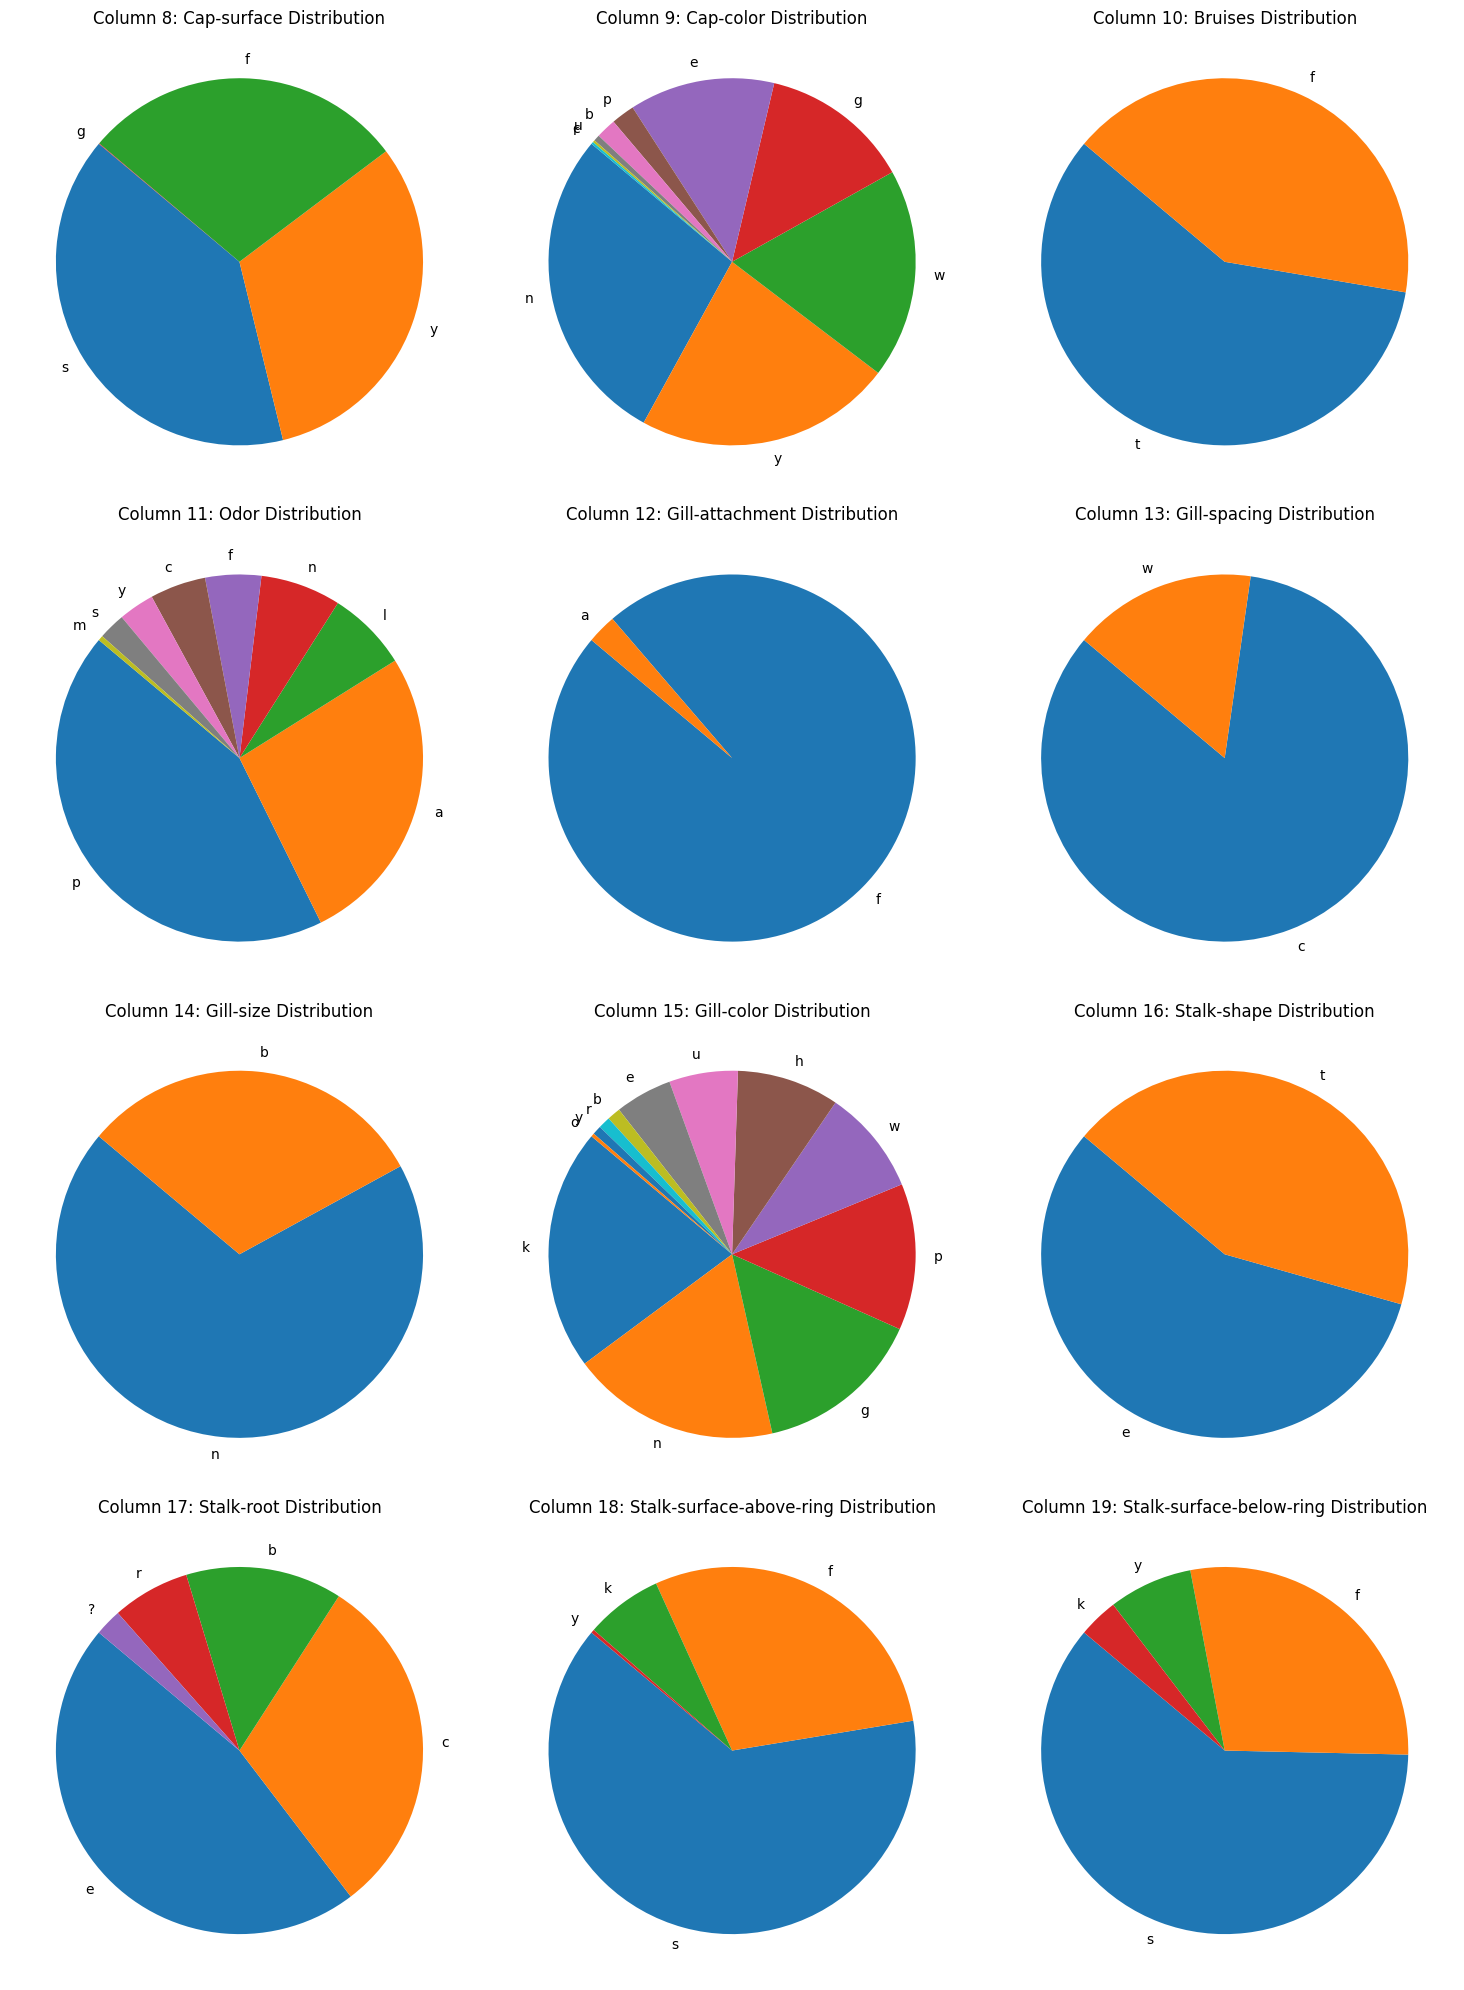

In [26]:
fig, axs = plt.subplots(4, 3, figsize=(15, 20))  # Create subplots with 4 rows and 3 columns

# Flatten the axs array to iterate over it easily
axs_flat = axs.flatten()

# Loop to plot pie charts
for i, (column, ax) in enumerate(zip(mushroom_data.columns[2:], axs_flat)):
    ax.pie(mushroom_data[column].value_counts(), labels=mushroom_data[column].unique(), startangle=140)
    ax.set_aspect('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
    ax.set_title('Column ' + str(i+8) + ': ' + column.capitalize() + ' Distribution')

# Hide empty subplots if there are fewer than 12 columns
for ax in axs_flat[len(mushroom_data.columns[2:]):]:
    ax.axis('off')

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


--Encoding Data--

In [27]:
le = LabelEncoder()
mushroom_data = mushroom_data.apply(LabelEncoder().fit_transform)
#poisonous 1 and edible 0
mushroom_data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [28]:
mushroom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   class                     8124 non-null   int32
 1   cap-shape                 8124 non-null   int32
 2   cap-surface               8124 non-null   int32
 3   cap-color                 8124 non-null   int32
 4   bruises                   8124 non-null   int32
 5   odor                      8124 non-null   int32
 6   gill-attachment           8124 non-null   int32
 7   gill-spacing              8124 non-null   int32
 8   gill-size                 8124 non-null   int32
 9   gill-color                8124 non-null   int32
 10  stalk-shape               8124 non-null   int32
 11  stalk-root                8124 non-null   int32
 12  stalk-surface-above-ring  8124 non-null   int32
 13  stalk-surface-below-ring  8124 non-null   int32
 14  stalk-color-above-ring    8124 non-null 

Visualisation: 
Visualizing the data helps in understanding patterns, which aids in selecting the appropriate model.

C:\Users\khush\AppData\Local\Temp\ipykernel_30328\656160899.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_columns['class'] = mushroom_data['class']


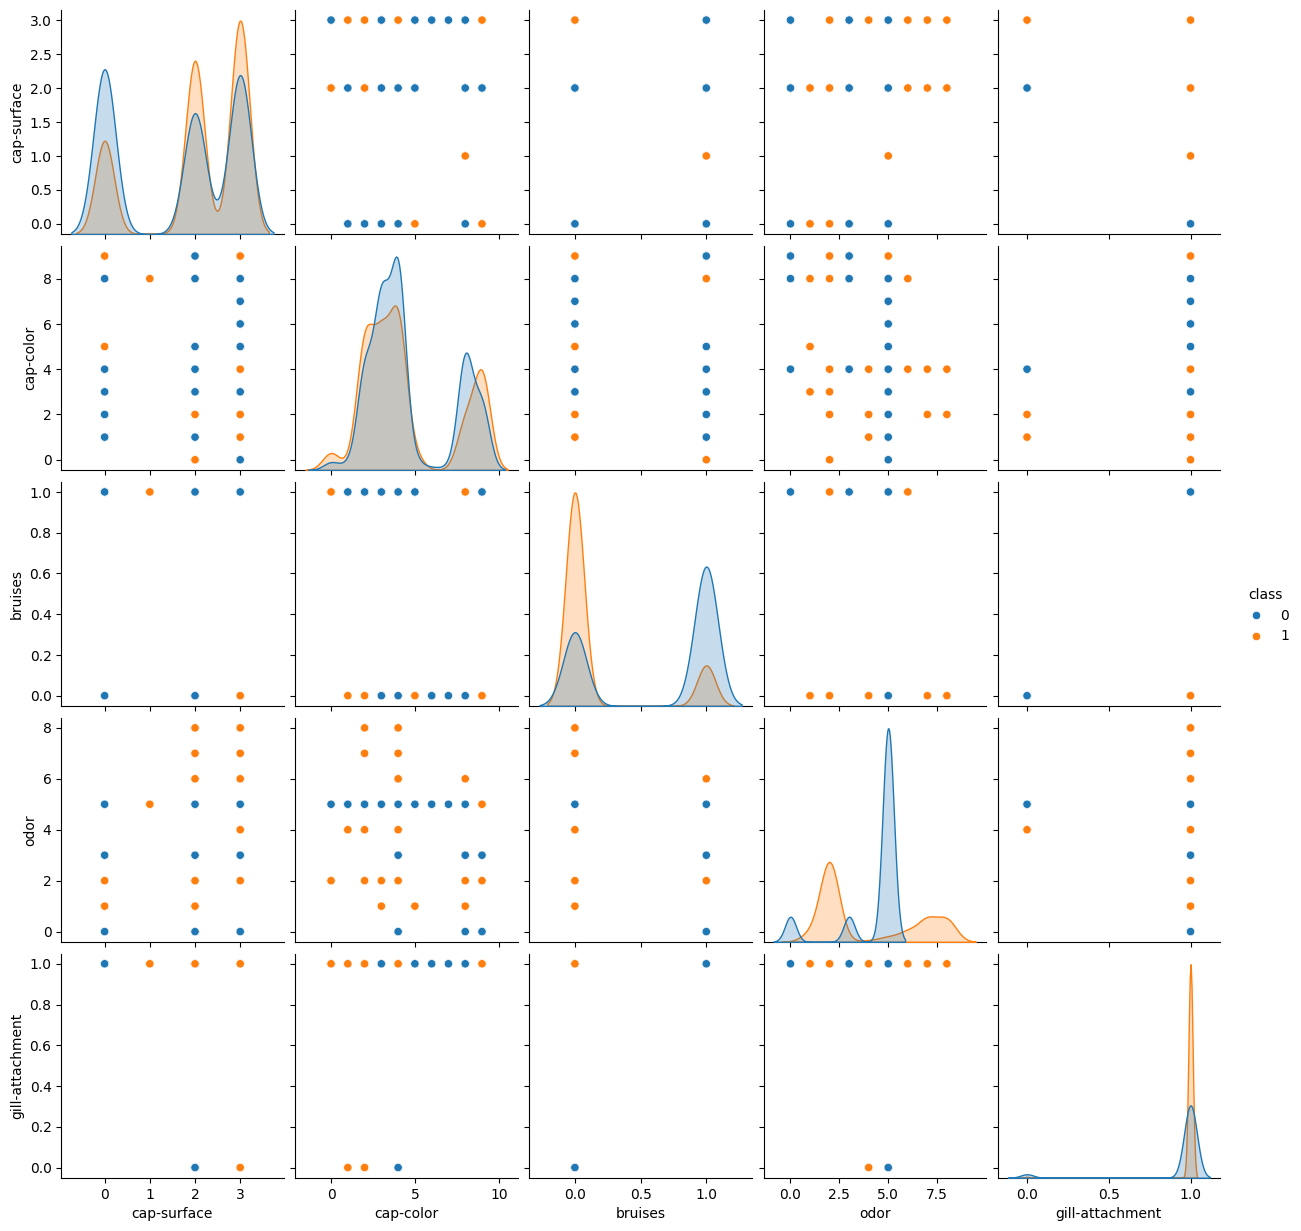

In [29]:
selected_columns = mushroom_data.iloc[:, 2:7]
selected_columns['class'] = mushroom_data['class']
sns.pairplot(selected_columns, hue='class')

<Axes: >

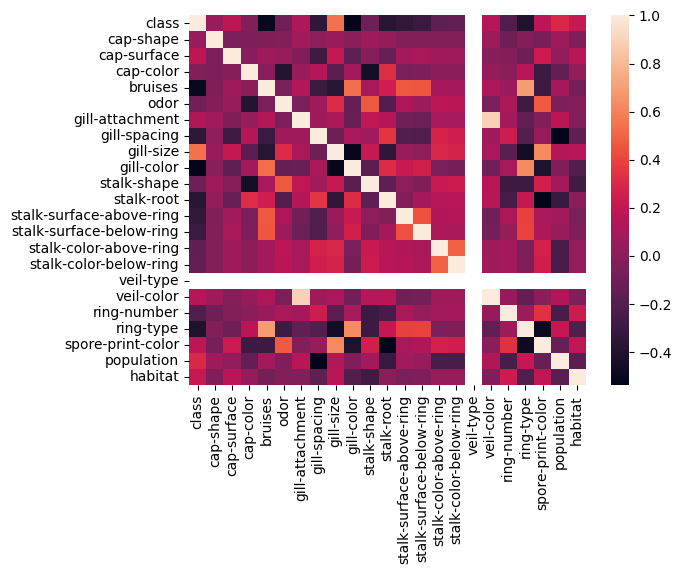

In [30]:
sns.heatmap(mushroom_data.corr())

The relationship between the features of a mushroom (such as cap shape, color, odor, etc.) and whether it is poisonous are complex and non linear. Mushroom dataset contains many categorical features. Random Forest and Decision trees can handle categorical data well without the need for extensive preprocessing like one-hot encoding, and this makes them a natural fit.

In [40]:
X=mushroom_data.drop(['class'],axis=1)
# all values in veil are same and not affect the prediction
Y=mushroom_data['class']

In [41]:
#split the data into training and testing, training data is used to train the model and testing data is used to validate it.
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [42]:
#use the decision tree and set parameters to avoid overfitting of the data
tree_D = DecisionTreeClassifier(max_depth=5, min_samples_split=10, min_samples_leaf=5)
tree_R=RandomForestClassifier(n_estimators=17,max_depth=5,)
#model=LogisticRegressor()
tree_R.fit(X_train,y_train)
tree_D.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=10)

In [44]:
# Make predictions on test set
y_predR = tree_R.predict(X_test)
# Evaluate the model random forest
accuracy_R = accuracy_score(y_test, y_predR)
    #number of correctly predicted values to total number of predictions made
f1_R = f1_score(y_test, y_predR)
    #ratio of the number of true positive  instances to the sum of true positive and false negative  instances
conf_matrix_R = confusion_matrix(y_test, y_predR)
'''
[[True positve,false positive],
[false negative,true negative]]
'''
precision = precision_score(y_test, y_predR)
    #number of true positive predictons to total positive predictions
recall = recall_score(y_test, y_predR)
    #ratio of the number of true positive  instances to the sum of true positive and false negative  instances
class_reportr = classification_report(y_test, y_predR)



#for decision Tree
y_predD=tree_D.predict(X_test)
accuracy_D = accuracy_score(y_test, y_predD)
f1_D = f1_score(y_test, y_predD)
precision_D=precision_score(y_test,y_predD)
conf_matrix_D = confusion_matrix(y_test, y_predD)
class_reportD = classification_report(y_test, y_predD)

'''print("Accuracy (Random forest):", accuracy_R)
print("Accuracy (Decision Tree):", accuracy_D)

print("F1 Score:(Random Forest)", f1_D)
print("F1 Score: (decison Tree)", f1_R)

print("Precision:(Random Forest)", f1_D)
print("Precision: (decison Tree)", f1_R)

print("Recall:(Random Forest)", f1_D)
print("Reacll: (decison Tree)", f1_R)'''

print("Confusion Matric (random Forest)\n",conf_matrix_R)
print("Confusion Matric (Decision Tree)\n",conf_matrix_D)

print("Cclassification Report(RF):\n",class_reportr)
print("Classification Report(DT):\n",class_reportD)

Confusion Matric (random Forest)
 [[1257    0]
 [  25 1156]]
Confusion Matric (Decision Tree)
 [[1222   35]
 [  16 1165]]
Cclassification Report(RF):
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1257
           1       1.00      0.98      0.99      1181

    accuracy                           0.99      2438
   macro avg       0.99      0.99      0.99      2438
weighted avg       0.99      0.99      0.99      2438

Classification Report(DT):
               precision    recall  f1-score   support

           0       0.99      0.97      0.98      1257
           1       0.97      0.99      0.98      1181

    accuracy                           0.98      2438
   macro avg       0.98      0.98      0.98      2438
weighted avg       0.98      0.98      0.98      2438



In [46]:
data_str = "p x y w t p f c n n e e s s w w p w o p k s u"

# Split the string into a list and convert to numpy array
data_list = data_str.split()
new_data = np.array(data_list[1:], dtype=str).reshape(1, -1)  # Reshape to (1, -1) for a single sample

# Encoding categorical data
label_encoders = []
for i in range(new_data.shape[1]):
    label_encoder = LabelEncoder()
    new_data[:, i] = label_encoder.fit_transform(new_data[:, i])
    label_encoders.append(label_encoder)

# Make prediction
prediction = tree_R.predict(new_data)

# Print the prediction
if prediction == 1:
    print("Poisonous")
else:
    print("Edible")


Poisonous


C:\Users\khush\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
